# MMOCR Tutorial

Welcome to MMOCR! This is the official colab tutorial for using MMOCR. In this tutorial, you will learn how to

- Install MMOCR from source
- Perform inference with
  - a pretrained text recognizer
  - a pretrained text detector
  - pretrained recognizer and detector
  - pretrained Key Information Extraction (KIE) model
- Evaluate a text detection model on an acadmic dataset
- Train a text recognizer with a toy dataset

Let's start!

## Install MMOCR from source

Installing MMOCR is straightforward. We recommend users to install MMOCR from source as any local code changes on MMOCR can take effect immediately, which is needed for research & developement purpose. Refer to [documentation](https://mmocr.readthedocs.io/en/dev-1.x/get_started/install.html) for more information.

### Install Dependencies using MIM

In [44]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'
!mim install 'mmdet>=3.0.0rc0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html


### Install MMOCR

In [45]:
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!git checkout 1.x
!pip install -r requirements.txt
!pip install -v -e .
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

fatal: destination path 'mmocr' already exists and is not an empty directory.
/content/mmocr/mmocr
Already on '1.x'
Your branch is up to date with 'origin/1.x'.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Using pip 22.0.4 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmocr/mmocr
ERROR: file:///content/mmocr/mmocr does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


## Inference

MMOCR has made inference easy by providing a variety of `Inferencer`s. In this section, we will focus on the usage of `MMOCRInferencer`. However, if you want to learn more about other `Inferencer`s, you can refer to the [documentation](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/inference.html) which provides detailed descriptions.

### Perform Inference with a Pretrained Text Recognizer 

We now demonstrate how to inference on a demo text recognition image with a pretrained text recognizer. SAR text recognizer is used for this demo, whose checkpoint can be found in the [official documentation](https://mmocr.readthedocs.io/en/dev-1.x/textrecog_models.html#sar). But you don't need to download it manually -- Our Inferencer script handles these cumbersome setup steps for you! 

Run the following command and you will get the inference result from return value as well as files, which will be  visualized in the end.

In [10]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(rec='SAR')
result = infer('demo/demo_text_recog.jpg', save_vis=True, return_vis=True)
print(result['predictions'])

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

03/09 02:19:09 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

/usr/local/lib/python3.9/dist-packages/mmengine/visualization/visualizer.py:166: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


[{'rec_texts': ['STAR'], 'rec_scores': [0.9994020462036133]}]


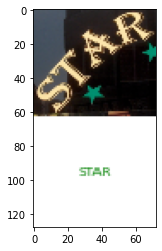

In [13]:
import matplotlib.pyplot as plt
import mmcv
plt.imshow(result['visualization'][0])
plt.show()

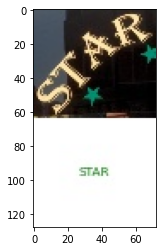

In [ ]:
predicted_img = mmcv.imread('results/vis/demo_text_recog.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

### Perform Inference with a Pretrained Text Detector 

Next, we perform inference with a pretrained TextSnake text detector and visualize the bounding box results for the demo text detection image.

In [16]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='TextSnake')
result = infer('demo/demo_text_det.jpg', return_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth
03/09 02:23:22 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

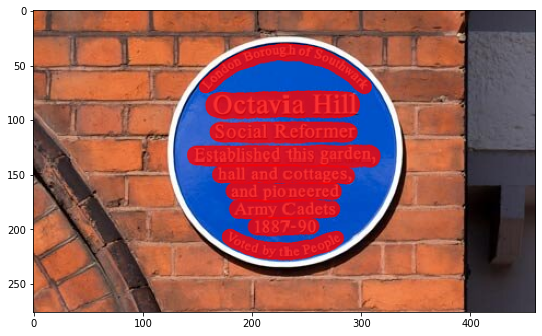

In [18]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

### Perform end-to-end OCR with pretrained recognizer and detector

We can  any text detector and recognizer into a pipeline that forms a standard OCR pipeline. Now we build our own OCR pipeline with TextSnake and SAR and apply it to `demo/demo_text_ocr.jpg`.

In [19]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='TextSnake', rec='SAR')
result = infer('demo/demo_text_ocr.jpg', return_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth
03/09 02:24:07 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth


/usr/local/lib/python3.9/dist-packages/mmengine/visualization/visualizer.py:166: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

03/09 02:24:08 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

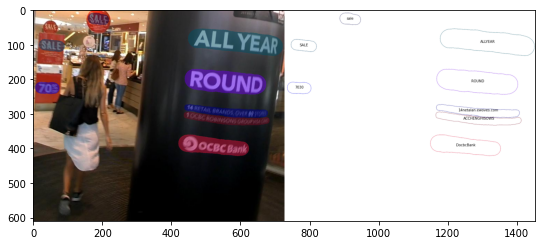

In [21]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

### Combine OCR with Downstream Tasks

MMOCR also supports downstream tasks of OCR, such as key information extraction (KIE). We can even add a KIE model, SDMG-R, to the pipeline applied to `demo/demo_kie.jpeg` and visualize its prediction.


In [23]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='TextSnake', rec='SAR', kie='SDMGR')
result = infer('demo/demo_kie.jpeg', save_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth
03/09 02:26:23 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

03/09 02:26:24 - mmengine

Output()

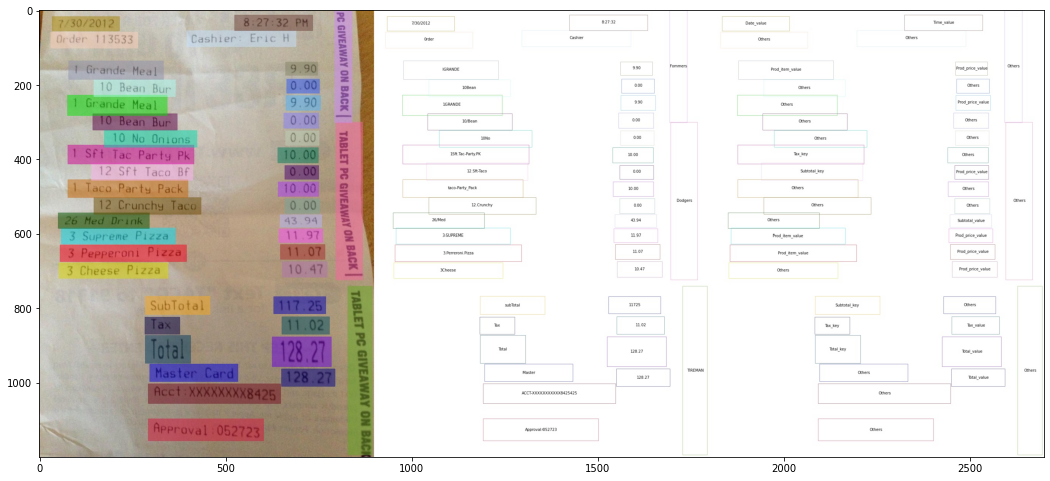

In [24]:
# Visualize the results
import mmcv
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('results/vis/demo_kie.jpg')
plt.figure(figsize=(18, 32))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Evaluating DBNet on ICDAR2015

This section provides guidance on how to evaluate a model using a popular academic dataset with pretrained weights in a Python interpreter. Another common practice is to train a model from CLI (command line interface), as illustrated [here](https://mmocr.readthedocs.io/en/dev-1.x/get_started/quick_run.html#testing).

Typically, the evaluation process involves several steps:

1. Convert the dataset into [formats supported by MMOCR](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/datasets.html). It should not be a concern if the dataset is obtained from [Dataset Preparer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/dataset_preparer.html), which can download, extract and convert the dataset into a MMOCR-ready form with a single line of command. Otherwise, you will need to manually download and prepare the dataset following the [guide](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/det.html), or even have to write a custom conversion script if your dataset is not on the list.
2. Modify the config for testing. 
3. Test the model. 

Now since ICDAR2015 is already supported by [Dataset Preparer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/dataset_preparer.html), we can use it to get the test split of ICDAR2015.

In [26]:
!python tools/dataset_converters/prepare_dataset.py icdar2015 --task textdet --split test

Dataset Name: Incidental Scene Text IC15
License Type: CC BY 4.0
License Link: https://creativecommons.org/licenses/by/4.0/
BibTeX: @inproceedings{karatzas2015icdar, title={ICDAR 2015 competition on robust reading}, author={Karatzas, Dimosthenis and Gomez-Bigorda, Lluis and Nicolaou, Anguelos and Ghosh, Suman and Bagdanov, Andrew and Iwamura, Masakazu and Matas, Jiri and Neumann, Lukas and Chandrasekhar, Vijay Ramaseshan and Lu, Shijian and others}, booktitle={2015 13th international conference on document analysis and recognition (ICDAR)}, pages={1156--1160}, year={2015}, organization={IEEE}}
MMOCR does not own the dataset. Using this dataset you must accept the license provided by the owners, and cite the corresponding papers appropriately.
If you do not agree with the above license, please cancel the progress immediately by pressing ctrl+c. Otherwise, you are deemed to accept the terms and conditions.
5...
4...
3...
2...
1...
Obtaining test Dataset...
Start to download ic15_textdet_

It's time to evaluate! MMOCR has released many pretrained weights together with model configs, which can be found at [DBNet's info page](https://mmocr.readthedocs.io/en/dev-1.x/textdet_models.html#dbnet). Here we choose a pair of them and specify the corresponding fields in config.

In [18]:
from mmengine import Config
# Load the config
cfg = Config.fromfile('configs/textdet/dbnet/dbnet_resnet18_fpnc_1200e_icdar2015.py')
# Specify the directory to store test results
cfg['work_dir'] = 'work_dirs/dbnet_resnet18_fpnc_1200e_icdar2015'
# The location of pretrained weight
cfg['load_from'] = 'https://download.openmmlab.com/mmocr/textdet/dbnet/dbnet_resnet18_fpnc_1200e_icdar2015/dbnet_resnet18_fpnc_1200e_icdar2015_20220825_221614-7c0e94f2.pth'

You can find more results in `work_dirs/dbnet_resnet18_fpnc_1200e_icdar2015` as the test process completes.

In [19]:
from mmengine.runner import Runner
import time

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.test()

03/09 06:25:15 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 209652396
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.13.1+cu116
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.6
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnet/dbnet_resnet18_fpnc_1200e_icdar2015/dbnet_resnet18_fpnc_1200e_icdar2015_20220825_221614-7c0e94f2.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

03/09 06:25:58 - mmengine - INFO - Load checkpoint from https://download.openmmlab.com/mmocr/textdet/dbnet/dbnet_resnet18_fpnc_1200e_icdar2015/dbnet_resnet18_fpnc_1200e_icdar2015_20220825_221614-7c0e94f2.pth


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


03/09 06:25:59 - mmengine - INFO - Epoch(test) [  5/500]    eta: 0:01:25  time: 0.1718  data_time: 0.0872  memory: 2462  
03/09 06:25:59 - mmengine - INFO - Epoch(test) [ 10/500]    eta: 0:00:56  time: 0.1145  data_time: 0.0452  memory: 1390  
03/09 06:25:59 - mmengine - INFO - Epoch(test) [ 15/500]    eta: 0:00:49  time: 0.0660  data_time: 0.0057  memory: 1390  
03/09 06:26:00 - mmengine - INFO - Epoch(test) [ 20/500]    eta: 0:00:44  time: 0.0715  data_time: 0.0072  memory: 1390  
03/09 06:26:00 - mmengine - INFO - Epoch(test) [ 25/500]    eta: 0:00:41  time: 0.0657  data_time: 0.0053  memory: 1390  
03/09 06:26:00 - mmengine - INFO - Epoch(test) [ 30/500]    eta: 0:00:38  time: 0.0584  data_time: 0.0044  memory: 1390  
03/09 06:26:00 - mmengine - INFO - Epoch(test) [ 35/500]    eta: 0:00:36  time: 0.0571  data_time: 0.0048  memory: 1390  
03/09 06:26:01 - mmengine - INFO - Epoch(test) [ 40/500]    eta: 0:00:35  time: 0.0651  data_time: 0.0054  memory: 1390  
03/09 06:26:01 - mmengin

{'icdar/precision': 0.8842046093310849,
 'icdar/recall': 0.7573423206547906,
 'icdar/hmean': 0.8158713692946058}

## Training SAR on a Toy Dataset

We now demonstrate how to train a recognizer on a provided dataset in a Python interpreter. Another common practice is to train a model from CLI (command line interface), as illustrated [here](https://mmocr.readthedocs.io/en/dev-1.x/get_started/quick_run.html#training).

Since training a full academic dataset is time consuming (usually takes about several hours or even days), we will train on the toy dataset for the SAR text recognition model and visualize the predictions. Text detection and other downstream tasks such as KIE follow similar procedures.

Training a model usually consists of the following steps:
1. Convert the dataset into [formats supported by MMOCR](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/datasets.html). It should not be a concern if the dataset is obtained from Dataset Preparer. Otherwise, you will need to manually download and prepare the dataset following the [guide](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/recog.html), or even have to write a custom conversion script if your dataset is not on the list.
2. Modify the config for training. 
3. Train the model. 

The toy dataset consisits of ten images as well as annotation files in both json and lmdb format, which can be found in [rec_toy_dataset](https://github.com/open-mmlab/mmocr/blob/1.x/tests/data/rec_toy_dataset/labels.json). 

### Visualize the Toy Dataset

We first get a sense of what the toy dataset looks like by visualizing one of the images and labels. 

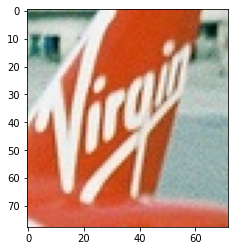

In [13]:
import mmcv
import matplotlib.pyplot as plt 

img = mmcv.imread('tests/data/rec_toy_dataset/imgs/1058891.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [14]:
# Inspect the labels of the annootation file
!cat tests/data/rec_toy_dataset/labels.json

{
    "metainfo": {
        "dataset_type": "TextRecogDataset",
        "task_name": "textrecog"
    },
    "data_list": [
        {
            "instances": [
                {
                    "text": "GRAND"
                }
            ],
            "img_path": "1223731.jpg"
        },
        {
            "instances": [
                {
                    "text": "HOTEL"
                }
            ],
            "img_path": "1223733.jpg"
        },
        {
            "instances": [
                {
                    "text": "HOTEL"
                }
            ],
            "img_path": "1223732.jpg"
        },
        {
            "instances": [
                {
                    "text": "PACIFIC"
                }
            ],
            "img_path": "1223729.jpg"
        },
        {
            "instances": [
                {
                    "text": "03/09/2009"
                }
            ],
            "img_path": "1036169.jpg"
        },
     

### Modify the Configuration File

In order to perform inference for SAR on colab, we need to modify the config file to accommodate some of the settings of colab. 

In [2]:
from mmengine import Config
# Load the config
cfg = Config.fromfile('configs/textrecog/sar/sar_resnet31_parallel-decoder_5e_toy.py')

In [9]:
cfg.work_dir = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/'

cfg.optim_wrapper.optimizer.lr = 1e-3 / 8
cfg.train_dataloader.batch_size = 5
cfg.train_cfg.max_epochs = 10

# We don't need any learning rate scheduler for a toy dataset
# thus clear parameter scheduler here
cfg.param_scheduler = None

# Set seed thus the results are more reproducible
cfg.randomness = dict(seed=0)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
toy_data_root = 'tests/data/rec_toy_dataset/'
toy_rec_train = dict(
    type='OCRDataset',
    data_root='tests/data/rec_toy_dataset/',
    data_prefix=dict(img_path='imgs/'),
    ann_file='labels.json',
    pipeline=[
        dict(
            type='LoadImageFromFile',
            file_client_args=dict(backend='disk'),
            ignore_empty=True,
            min_size=2),
        dict(type='LoadOCRAnnotations', with_text=True),
        dict(
            type='RescaleToHeight',
            height=48,
            min_width=48,
            max_width=160,
            width_divisor=4),
        dict(type='PadToWidth', width=160),
        dict(
            type='PackTextRecogInputs',
            meta_keys=('img_path', 'ori_shape', 'img_shape', 'valid_ratio'))
    ],
    test_mode=False)
toy_rec_test = dict(
    type='OCRDataset',
    data_root='tests/data/rec_toy_dataset/',
    data_prefix=dict(img_path='imgs/'),
    ann_file='labels.json',
    pipeline=[
        dict(type='LoadIma

### Train the SAR Text Recognizer 
Let's train the SAR text recognizer on the toy dataset for 10 epochs. 

In [10]:
from mmengine.runner import Runner
import time

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.train()

03/09 05:03:47 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.13.1+cu116
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.6
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-g

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


03/09 05:03:59 - mmengine - INFO - Checkpoints will be saved to /content/mmocr/work_dirs/sar_resnet31_parallel-decoder_5e_toy.


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


03/09 05:04:02 - mmengine - INFO - Exp name: sar_resnet31_parallel-decoder_5e_toy_20230309_050347
03/09 05:04:02 - mmengine - INFO - Epoch(train)  [1][20/20]  lr: 1.2500e-04  eta: 0:00:27  time: 0.1363  data_time: 0.0034  memory: 2771  loss: 3.3683  loss_ce: 3.3683
03/09 05:04:02 - mmengine - INFO - Saving checkpoint at 1 epochs
03/09 05:04:05 - mmengine - WARNING - `save_param_scheduler` is True but `self.param_schedulers` is None, so skip saving parameter schedulers


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


03/09 05:04:10 - mmengine - INFO - Epoch(val) [1][10/10]  Toy/recog/word_acc: 0.0000  Toy/recog/word_acc_ignore_case: 0.0000  Toy/recog/word_acc_ignore_case_symbol: 0.0000  Toy/recog/char_recall: 0.1935  Toy/recog/char_precision: 0.2000
03/09 05:04:12 - mmengine - INFO - Exp name: sar_resnet31_parallel-decoder_5e_toy_20230309_050347
03/09 05:04:12 - mmengine - INFO - Epoch(train)  [2][20/20]  lr: 1.2500e-04  eta: 0:00:23  time: 0.1389  data_time: 0.0048  memory: 2771  loss: 2.3823  loss_ce: 2.3823
03/09 05:04:12 - mmengine - INFO - Saving checkpoint at 2 epochs
03/09 05:04:16 - mmengine - WARNING - `save_param_scheduler` is True but `self.param_schedulers` is None, so skip saving parameter schedulers
03/09 05:04:20 - mmengine - INFO - Epoch(val) [2][10/10]  Toy/recog/word_acc: 0.0000  Toy/recog/word_acc_ignore_case: 0.0000  Toy/recog/word_acc_ignore_case_symbol: 0.0000  Toy/recog/char_recall: 0.1774  Toy/recog/char_precision: 0.3667
03/09 05:04:23 - mmengine - INFO - Exp name: sar_resn

SARNet(
  (data_preprocessor): TextRecogDataPreprocessor()
  (backbone): ResNet31OCR(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1_1): ReLU(inplace=True)
    (conv1_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1_2): ReLU(inplace=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (block2): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (bn2): BatchNorm2d(256, eps=

### Perform inference and Visualize the Predictions

We can test the model through [Infernecer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/inference.html), then print out and visualize its return values.

Loads checkpoint by local backend from path: work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_10.pth
03/09 05:13:49 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

/usr/local/lib/python3.9/dist-packages/mmengine/visualization/visualizer.py:166: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


result: [{'text': '03/09/2009', 'scores': 0.7484951853752136}]


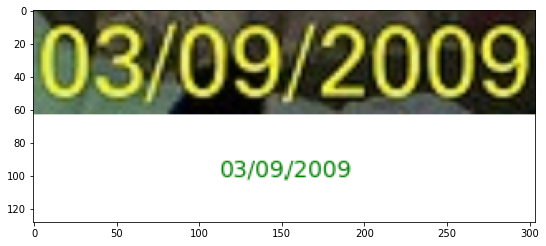

In [12]:
import matplotlib.pyplot as plt
from mmocr.apis import TextRecInferencer

img = 'tests/data/rec_toy_dataset/imgs/1036169.jpg'
checkpoint = "work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_10.pth"
cfg = "configs/textrecog/sar/sar_resnet31_parallel-decoder_5e_toy.py"

infer = TextRecInferencer(cfg, checkpoint)
result = infer(img, return_vis=True)

print(f'result: {result["predictions"]}')

plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()